In [1]:
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

# wrangle
import os

# transform
import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
import seaborn as sns

# working with dates
from datetime import datetime

# modeling
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing

# evaluate
from sklearn.metrics import mean_squared_error
from math import sqrt 

import wrangle as w

In [2]:
df = w.get_mental_health_data()
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108553 entries, 0 to 108552
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   index                      108553 non-null  int64  
 1   Entity                     108553 non-null  object 
 2   Code                       103141 non-null  object 
 3   Year                       108553 non-null  object 
 4   Schizophrenia (%)          25875 non-null   object 
 5   Bipolar disorder (%)       19406 non-null   object 
 6   Eating disorders (%)       100236 non-null  object 
 7   Anxiety disorders (%)      6468 non-null    float64
 8   Drug use disorders (%)     6468 non-null    float64
 9   Depression (%)             6468 non-null    float64
 10  Alcohol use disorders (%)  6468 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 9.1+ MB
None


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [3]:
mental_health_df, population_df, rates_df, depressive_rates_df = w.separate_data()

In [4]:
mental_health_df = w.clean_mental_health_data(mental_health_df)

There are 0, 0.0%, null values in index
There are 0, 0.0%, null values in entity
There are 980, 15.15%, null values in code
There are 0, 0.0%, null values in year
There are 0, 0.0%, null values in schizophrenia
There are 0, 0.0%, null values in bipolar_disorder
There are 0, 0.0%, null values in eating_disorders
There are 0, 0.0%, null values in anxiety_disorders
There are 0, 0.0%, null values in drug_use_disorders
There are 0, 0.0%, null values in depression
There are 0, 0.0%, null values in alcohol_use_disorders


In [5]:
mental_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1990 to 2017
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   entity                 6468 non-null   object 
 1   code                   6468 non-null   object 
 2   schizophrenia          6468 non-null   float64
 3   bipolar_disorder       6468 non-null   float64
 4   eating_disorders       6468 non-null   float64
 5   anxiety_disorders      6468 non-null   float64
 6   drug_use_disorders     6468 non-null   float64
 7   depression             6468 non-null   float64
 8   alcohol_use_disorders  6468 non-null   float64
dtypes: float64(7), object(2)
memory usage: 505.3+ KB


In [6]:
mental_health_df.head()

,entity,code,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
year,,,,,,,,,
1990,Afghanistan,AFG,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1991,Afghanistan,AFG,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
1992,Afghanistan,AFG,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
1993,Afghanistan,AFG,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
1994,Afghanistan,AFG,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [7]:
population_df

,index,entity,code,year,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
6469,6469,Afghanistan,AFG,1800,NaN,NaN,3280000,NaN,NaN,NaN,NaN
6470,6470,Afghanistan,AFG,1801,NaN,NaN,3280000,NaN,NaN,NaN,NaN
6471,6471,Afghanistan,AFG,1802,NaN,NaN,3280000,NaN,NaN,NaN,NaN
6472,6472,Afghanistan,AFG,1803,NaN,NaN,3280000,NaN,NaN,NaN,NaN
6473,6473,Afghanistan,AFG,1804,NaN,NaN,3280000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
54271,54271,Zimbabwe,ZWE,2015,2.789152,3.455323,13815000.000000,NaN,NaN,NaN,NaN
54272,54272,Zimbabwe,ZWE,2016,2.799308,3.479071,14030000.000000,NaN,NaN,NaN,NaN
54273,54273,Zimbabwe,ZWE,2017,2.812022,3.50086,14237000.000000,NaN,NaN,NaN,NaN
54274,54274,Zimbabwe,ZWE,2018,NaN,NaN,14439000.000000,NaN,NaN,NaN,NaN


In [8]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47807 entries, 6469 to 54275
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  47807 non-null  int64  
 1   entity                 47807 non-null  object 
 2   code                   46081 non-null  object 
 3   year                   47807 non-null  object 
 4   schizophrenia          6468 non-null   object 
 5   bipolar_disorder       6468 non-null   object 
 6   eating_disorders       46883 non-null  object 
 7   anxiety_disorders      0 non-null      float64
 8   drug_use_disorders     0 non-null      float64
 9   depression             0 non-null      float64
 10  alcohol_use_disorders  0 non-null      float64
dtypes: float64(4), int64(1), object(6)
memory usage: 4.0+ MB


In [9]:
population_df = w.clean_population_data(population_df)

There are 0, 0.0%, null values in index
There are 0, 0.0%, null values in entity
There are 1726, 3.61%, null values in code
There are 0, 0.0%, null values in year
There are 41339, 86.47%, null values in schizophrenia
There are 41339, 86.47%, null values in bipolar_disorder
There are 924, 1.93%, null values in eating_disorders
There are 47807, 100.0%, null values in anxiety_disorders
There are 47807, 100.0%, null values in drug_use_disorders
There are 47807, 100.0%, null values in depression
There are 47807, 100.0%, null values in alcohol_use_disorders


In [10]:
population_df

,entity,code,prevalence_males,prevalance_female,effected_population
year,,,,,
1990,Afghanistan,AFG,3.499982,4.647815,12412000.0
1991,Afghanistan,AFG,3.503947,4.655772,13299000.0
1992,Afghanistan,AFG,3.508912,4.662066,14486000.0
1993,Afghanistan,AFG,3.513429,4.669012,15817000.0
1994,Afghanistan,AFG,3.515578,4.673050,17076000.0
...,...,...,...,...,...
2013,Zimbabwe,ZWE,2.769193,3.424106,13350000.0
2014,Zimbabwe,ZWE,2.778101,3.437674,13587000.0
2015,Zimbabwe,ZWE,2.789152,3.455323,13815000.0


In [11]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5488 entries, 1990 to 2017
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   entity               5488 non-null   object 
 1   code                 5488 non-null   object 
 2   prevalence_males     5488 non-null   float64
 3   prevalance_female    5488 non-null   float64
 4   effected_population  5488 non-null   float64
dtypes: float64(3), object(2)
memory usage: 257.2+ KB


In [12]:
rates_df

,index,entity,code,year,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
54277,54277,Afghanistan,AFG,1800,NaN,NaN,3280000,NaN,NaN,NaN,NaN
54278,54278,Afghanistan,AFG,1801,NaN,NaN,3280000,NaN,NaN,NaN,NaN
54279,54279,Afghanistan,AFG,1802,NaN,NaN,3280000,NaN,NaN,NaN,NaN
54280,54280,Afghanistan,AFG,1803,NaN,NaN,3280000,NaN,NaN,NaN,NaN
54281,54281,Afghanistan,AFG,1804,NaN,NaN,3280000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
102079,102079,Zimbabwe,ZWE,2015,27.197061,3068.250731,13815000.0,NaN,NaN,NaN,NaN
102080,102080,Zimbabwe,ZWE,2016,26.839591,3081.782858,14030000.0,NaN,NaN,NaN,NaN
102081,102081,Zimbabwe,ZWE,2017,26.391769,3094.795065,14237000.0,NaN,NaN,NaN,NaN
102082,102082,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0,NaN,NaN,NaN,NaN


In [13]:
rates_df = w.clean_rates_data(rates_df)

There are 0, 0.0%, null values in index
There are 0, 0.0%, null values in entity
There are 1126, 14.61%, null values in code
There are 1239, 16.08%, null values in suicide_rates_per_100k
There are 1239, 16.08%, null values in depressive_disorder_rates_per_100k
There are 924, 11.99%, null values in population


In [14]:
rates_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5488 entries, 1990 to 2017
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   entity                          5488 non-null   object 
 1   code                            5488 non-null   object 
 2   population                      5488 non-null   float64
 3   percentage_suicide              5488 non-null   float64
 4   percentage_depressive_disorder  5488 non-null   float64
 5   num_suicide                     5488 non-null   float64
 6   num_depressed                   5488 non-null   float64
dtypes: float64(5), object(2)
memory usage: 343.0+ KB


In [15]:
rates_df

,entity,code,population,percentage_suicide,percentage_depressive_disorder,num_suicide,num_depressed
year,,,,,,,
1990,Afghanistan,AFG,12412000.0,0.000103,0.040398,1281.0,501414.0
1991,Afghanistan,AFG,13299000.0,0.000103,0.040463,1373.0,538112.0
1992,Afghanistan,AFG,14486000.0,0.000103,0.040537,1488.0,587220.0
1993,Afghanistan,AFG,15817000.0,0.000104,0.040602,1641.0,642202.0
1994,Afghanistan,AFG,17076000.0,0.000106,0.040623,1806.0,693677.0
...,...,...,...,...,...,...,...
2013,Zimbabwe,ZWE,13350000.0,0.000284,0.030483,3786.0,406943.0
2014,Zimbabwe,ZWE,13587000.0,0.000276,0.030570,3751.0,415354.0
2015,Zimbabwe,ZWE,13815000.0,0.000272,0.030683,3757.0,423879.0


In [16]:
depressive_rates_df

,index,entity,code,year,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
102085,102085,Afghanistan,AFG,1990,318435.81367,NaN,NaN,NaN,NaN,NaN,NaN
102086,102086,Afghanistan,AFG,1991,329044.773956,NaN,NaN,NaN,NaN,NaN,NaN
102087,102087,Afghanistan,AFG,1992,382544.572895,NaN,NaN,NaN,NaN,NaN,NaN
102088,102088,Afghanistan,AFG,1993,440381.507393,NaN,NaN,NaN,NaN,NaN,NaN
102089,102089,Afghanistan,AFG,1994,456916.645489,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
108548,108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
108549,108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
108550,108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN
108551,108551,Zimbabwe,ZWE,2016,330437.353798,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
depressive_rates_df = w.clean_depressive_rates_data(depressive_rates_df)

In [18]:
depressive_rates_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1990 to 2017
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   entity                          6468 non-null   object 
 1   code                            6468 non-null   object 
 2   prevelance_depressive_disorder  6468 non-null   float64
dtypes: float64(1), object(2)
memory usage: 202.1+ KB


In [19]:
depressive_rates_df

,entity,code,prevelance_depressive_disorder
year,,,
1990,Afghanistan,AFG,318435.813670
1991,Afghanistan,AFG,329044.773956
1992,Afghanistan,AFG,382544.572895
1993,Afghanistan,AFG,440381.507393
1994,Afghanistan,AFG,456916.645489
...,...,...,...
2013,Zimbabwe,ZWE,303564.603590
2014,Zimbabwe,ZWE,311665.769283
2015,Zimbabwe,ZWE,320638.507158


In [20]:
mental_health_df.shape

(6468, 9)

In [21]:
population_df.shape

(5488, 5)

In [22]:
rates_df.shape

(5488, 7)

In [23]:
depressive_rates_df.shape

(6468, 3)

In [24]:
df_1, df_2, df_3, df_4 = w.yearly_aggregation()

There are 0, 0.0%, null values in index
There are 0, 0.0%, null values in entity
There are 980, 15.15%, null values in code
There are 0, 0.0%, null values in year
There are 0, 0.0%, null values in schizophrenia
There are 0, 0.0%, null values in bipolar_disorder
There are 0, 0.0%, null values in eating_disorders
There are 0, 0.0%, null values in anxiety_disorders
There are 0, 0.0%, null values in drug_use_disorders
There are 0, 0.0%, null values in depression
There are 0, 0.0%, null values in alcohol_use_disorders
There are 0, 0.0%, null values in index
There are 0, 0.0%, null values in entity
There are 1726, 3.61%, null values in code
There are 0, 0.0%, null values in year
There are 41339, 86.47%, null values in schizophrenia
There are 41339, 86.47%, null values in bipolar_disorder
There are 924, 1.93%, null values in eating_disorders
There are 47807, 100.0%, null values in anxiety_disorders
There are 47807, 100.0%, null values in drug_use_disorders
There are 47807, 100.0%, null values

In [25]:
df = df_1.join(df_2)

In [26]:
df = df.join(df_3)

In [27]:
df_4

,population,percentage_suicide,percentage_depressive_disorder,num_suicide,num_depressed
year,,,,,
1990,5.431311e+07,0.000127,0.033591,8269.010204,1.879130e+06
1991,5.520078e+07,0.000127,0.033624,8450.234694,1.911906e+06
1992,5.606372e+07,0.000128,0.033651,8701.137755,1.943461e+06
1993,5.690681e+07,0.000130,0.033671,8936.010204,1.973643e+06
1994,5.773827e+07,0.000131,0.033688,9102.760204,2.002636e+06
1995,5.856468e+07,0.000132,0.033696,9144.964286,2.030302e+06
1996,5.938713e+07,0.000131,0.033695,9002.469388,2.057392e+06
1997,6.020409e+07,0.000130,0.033684,8924.153061,2.084454e+06
1998,6.101693e+07,0.000129,0.033664,8855.959184,2.111355e+06


In [28]:
df = w.merge_yearly_aggregation()
df

There are 0, 0.0%, null values in index
There are 0, 0.0%, null values in entity
There are 980, 15.15%, null values in code
There are 0, 0.0%, null values in year
There are 0, 0.0%, null values in schizophrenia
There are 0, 0.0%, null values in bipolar_disorder
There are 0, 0.0%, null values in eating_disorders
There are 0, 0.0%, null values in anxiety_disorders
There are 0, 0.0%, null values in drug_use_disorders
There are 0, 0.0%, null values in depression
There are 0, 0.0%, null values in alcohol_use_disorders
There are 0, 0.0%, null values in index
There are 0, 0.0%, null values in entity
There are 1726, 3.61%, null values in code
There are 0, 0.0%, null values in year
There are 41339, 86.47%, null values in schizophrenia
There are 41339, 86.47%, null values in bipolar_disorder
There are 924, 1.93%, null values in eating_disorders
There are 47807, 100.0%, null values in anxiety_disorders
There are 47807, 100.0%, null values in drug_use_disorders
There are 47807, 100.0%, null values

,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders,prevalence_males,prevalance_female,effected_population,prevelance_depressive_disorder,population,percentage_suicide,percentage_depressive_disorder,num_suicide,num_depressed
year,,,,,,,,,,,,,,,,
1990,0.209548,0.715392,0.221774,3.957269,0.808283,3.506288,1.546533,2.785745,4.151912,5.431311e+07,3.490000e+06,5.431311e+07,0.000127,0.033591,8269.010204,1.879130e+06
1991,0.209586,0.715740,0.222076,3.960009,0.813466,3.510948,1.553500,2.790831,4.156629,5.520078e+07,3.556168e+06,5.520078e+07,0.000127,0.033624,8450.234694,1.911906e+06
1992,0.209634,0.716091,0.222481,3.962778,0.818692,3.515033,1.559927,2.795406,4.160464,5.606372e+07,3.622025e+06,5.606372e+07,0.000128,0.033651,8701.137755,1.943461e+06
1993,0.209690,0.716430,0.223033,3.965405,0.823780,3.518531,1.565611,2.799399,4.163548,5.690681e+07,3.686046e+06,5.690681e+07,0.000130,0.033671,8936.010204,1.973643e+06
1994,0.209751,0.716755,0.223710,3.967976,0.828389,3.521437,1.570127,2.802673,4.165889,5.773827e+07,3.749624e+06,5.773827e+07,0.000131,0.033688,9102.760204,2.002636e+06
1995,0.209810,0.717037,0.224514,3.970051,0.832391,3.523328,1.573532,2.805311,4.166812,5.856468e+07,3.812622e+06,5.856468e+07,0.000132,0.033696,9144.964286,2.030302e+06
1996,0.209877,0.717293,0.225581,3.972869,0.837124,3.524659,1.576549,2.807169,4.166831,5.938713e+07,3.876798e+06,5.938713e+07,0.000131,0.033695,9002.469388,2.057392e+06
1997,0.209966,0.717564,0.226980,3.977437,0.843217,3.525602,1.579598,2.808346,4.165429,6.020409e+07,3.943264e+06,6.020409e+07,0.000130,0.033684,8924.153061,2.084454e+06
1998,0.210075,0.717843,0.228581,3.982739,0.849664,3.525968,1.582334,2.808812,4.163179,6.101693e+07,4.010870e+06,6.101693e+07,0.000129,0.033664,8855.959184,2.111355e+06


In [29]:
train_size = .7
train_index = round(train_size * df.shape[0])
train_index

20

In [30]:
train = df[:train_index]
test = df[train_index:]

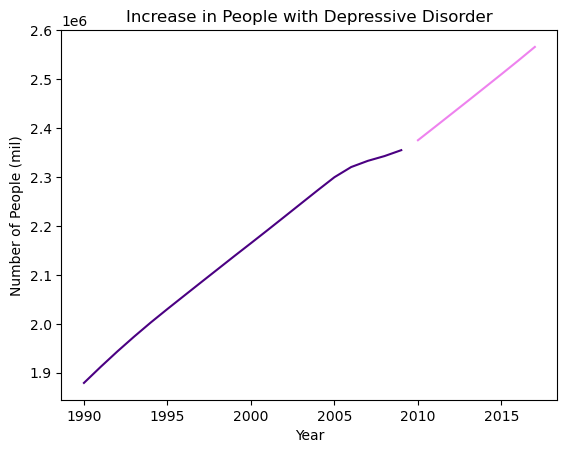

In [31]:
plt.plot(train.index, train.num_depressed, color='indigo')
plt.plot(test.index, test.num_depressed, color='violet')
plt.title('Increase in People with Depressive Disorder')
plt.xlabel('Year')
plt.ylabel('Number of People (mil)')
plt.show()

In [36]:
rates_df

,entity,code,population,percentage_suicide,percentage_depressive_disorder,num_suicide,num_depressed
year,,,,,,,
1990,Afghanistan,AFG,12412000.0,0.000103,0.040398,1281.0,501414.0
1991,Afghanistan,AFG,13299000.0,0.000103,0.040463,1373.0,538112.0
1992,Afghanistan,AFG,14486000.0,0.000103,0.040537,1488.0,587220.0
1993,Afghanistan,AFG,15817000.0,0.000104,0.040602,1641.0,642202.0
1994,Afghanistan,AFG,17076000.0,0.000106,0.040623,1806.0,693677.0
...,...,...,...,...,...,...,...
2013,Zimbabwe,ZWE,13350000.0,0.000284,0.030483,3786.0,406943.0
2014,Zimbabwe,ZWE,13587000.0,0.000276,0.030570,3751.0,415354.0
2015,Zimbabwe,ZWE,13815000.0,0.000272,0.030683,3757.0,423879.0


In [32]:
us_rates_df = rates_df[rates_df.entity == 'United States']

In [38]:
world_rates_df = rates_df.groupby('year').mean()

In [39]:
world_rates_df

,population,percentage_suicide,percentage_depressive_disorder,num_suicide,num_depressed
year,,,,,
1990,5.431311e+07,0.000127,0.033591,8269.010204,1.879130e+06
1991,5.520078e+07,0.000127,0.033624,8450.234694,1.911906e+06
1992,5.606372e+07,0.000128,0.033651,8701.137755,1.943461e+06
1993,5.690681e+07,0.000130,0.033671,8936.010204,1.973643e+06
1994,5.773827e+07,0.000131,0.033688,9102.760204,2.002636e+06
1995,5.856468e+07,0.000132,0.033696,9144.964286,2.030302e+06
1996,5.938713e+07,0.000131,0.033695,9002.469388,2.057392e+06
1997,6.020409e+07,0.000130,0.033684,8924.153061,2.084454e+06
1998,6.101693e+07,0.000129,0.033664,8855.959184,2.111355e+06
